% figures
% 1 schematic -> TODO: update
% 2 a+b initial state vs final state
% 3 histogram

% 4 cd vs individualism
% 5 friends vs decision allignment

% 6 clustering?!

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from dataclasses import *

import AvantgardeModelUtils
reload(AvantgardeModelUtils)
from AvantgardeModelUtils import *

import metrics
reload(metrics)
from metrics import *

In [2]:
file_high_gamma = "../data/evolution/agent_data_evolution_beta-avantgarde_mode-0.80_concentration-5.0.csv"
file_mid_gamma = "../data/evolution/agent_data_evolution_beta-avantgarde_mode-0.50_concentration-5.0.csv"
file_low_gamma = "../data/evolution/agent_data_evolution_beta-avantgarde_mode-0.20_concentration-5.0.csv"
file_uniform = "../data/distributions/agent_data_1000steps.csv"

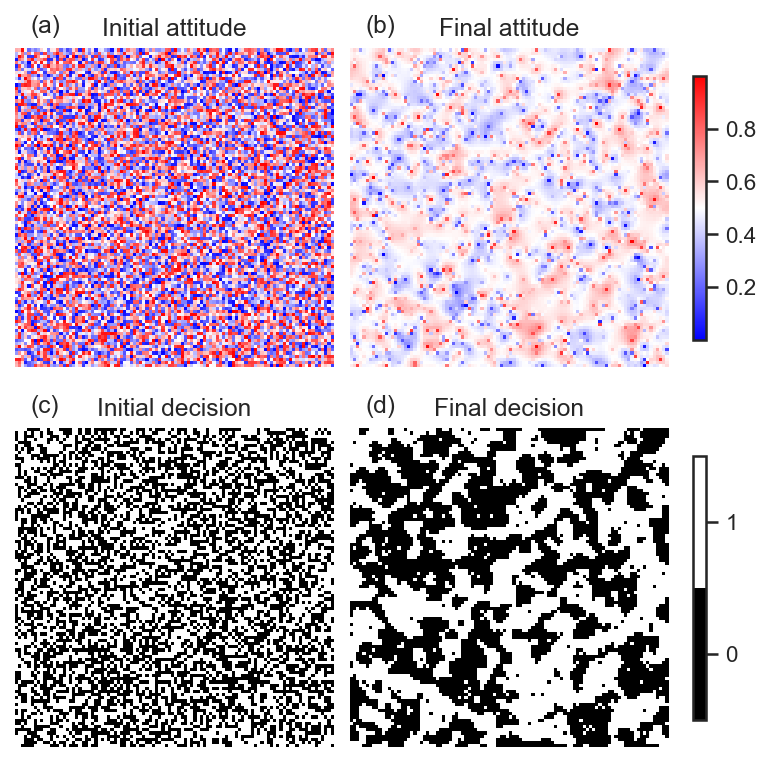

In [3]:
data_uniform = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"])

sample_uniform = data_uniform.query("seed == 100")

colors = ((0, 0, 0), (1, 1, 1))
cmap_black_white = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

sns.set(style="white", color_codes=True,
        rc={'figure.figsize':(7,6.4),
            'figure.dpi':147})

fig, (choice, decision) = plt.subplots(2, 2, sharex=True, sharey=True)

startStep = 0
endStep = 1000
im1 = sns.heatmap(Grid(Choice(sample_uniform, startStep)),
                  ax=choice[0],
                  square=True,
                  cbar=False,
                  cmap="bwr")
choice[0].set_title('Initial attitude', size=12);
choice[0].text(0.05, 1.05, "(a)", transform=choice[0].transAxes, size=12)

im2 = sns.heatmap(Grid(Choice(sample_uniform, endStep)),
                  ax=choice[1],
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap="bwr")
choice[1].set_title('Final attitude', size=12);
choice[1].text(0.05, 1.05, "(b)", transform=choice[1].transAxes, size=12)
#fig.subplots_adjust(wspace=0.05, hspace=0)

im3 = sns.heatmap(Grid(Choice(sample_uniform, startStep)),
                  ax=decision[0],
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap=cmap_black_white)
decision[0].set_title('Initial decision', size=12);
decision[0].text(0.05, 1.05, "(c)", transform=decision[0].transAxes, size=12)
#fig.subplots_adjust(wspace=0.05, hspace=0)

im4 = sns.heatmap(Grid(Choice(sample_uniform, endStep)),
                  ax=decision[1],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap=cmap_black_white)
decision[1].set_title('Final decision', size=12);
decision[1].text(0.05, 1.05, "(d)", transform=decision[1].transAxes, size=12)

fig.subplots_adjust(wspace=0.05, hspace=0.15)

mappable = im1.get_children()[0]
fig.colorbar(mappable, ax=choice, shrink=.8, orientation='vertical', pad=0.03)
mappable_decision = im3.get_children()[0]
colorbar = fig.colorbar(mappable_decision, ax=decision, shrink=.8, orientation='vertical', pad=0.03)
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['0', '1'])

plt.show()

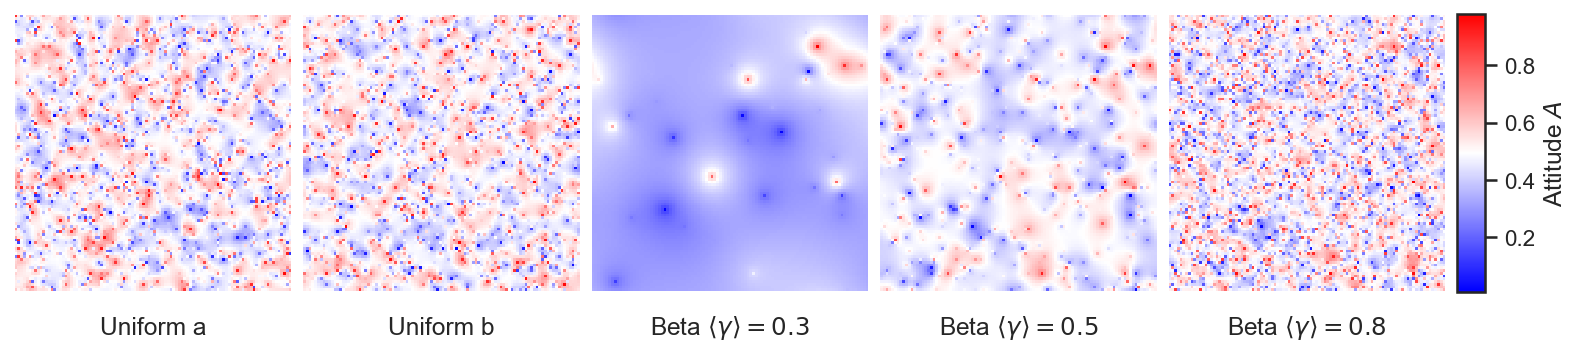

In [4]:
# plot results for different states
####################################

columns = ["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"]
data_uniform = LoadSimulation(file_uniform, columns=columns).query("step == 1_000")
data_mid_gamma = LoadSimulation(file_mid_gamma, columns=columns).query("step == 400")
data_low_gamma = LoadSimulation(file_low_gamma, columns=columns).query("step == 400")
data_high_gamma = LoadSimulation(file_high_gamma, columns=columns).query("step == 400")

from matplotlib.gridspec import GridSpec

# create the figure and the gridspec
fig = plt.figure(figsize=(10, 2.5))
gs = GridSpec(nrows=1, ncols=6, width_ratios=[1, 1, 1, 1, 1, 0.1])

# create the subplots
ax = [fig.add_subplot(gs[0, i]) for i in range(5)]


plt.rcParams.update({"figure.dpi": 147})

colors = ((0, 0, 0), (1, 1, 1))
cmap_black_white = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

im1 = sns.heatmap(Grid(data_uniform.query("seed==103").get("affinity").values),
                ax=ax[0],
                  yticklabels=False,
                  xticklabels=False,
                  square=True,
                  cbar=False,
                  cmap="bwr")

im1 = sns.heatmap(Grid(data_uniform.query("seed==102").get("affinity").values),
                    ax=ax[1],
                  yticklabels=False,
                  xticklabels=False,
                  square=True,
                  cbar=False,
                  cmap="bwr")
#choice[0].set_title('Initial attitude', size=12);
#choice[0].text(0.05, 1.05, "(a)", transform=choice[0].transAxes, size=12)

im2 = sns.heatmap(Grid(data_low_gamma.query("seed==100").get("affinity").values),
                  ax=ax[2],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")
#choice[1].set_title('Final attitude', size=12);
#choice[1].text(0.05, 1.05, "(b)", transform=choice[1].transAxes, size=12)
#fig.subplots_adjust(wspace=0.05, hspace=0)

im3 = sns.heatmap(Grid(data_mid_gamma.query("seed==100").get("affinity").values),
                  ax=ax[3],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")
#decision[0].set_title('Initial decision', size=12);
#decision[0].text(0.05, 1.05, "(c)", transform=decision[0].transAxes, size=12)
#fig.subplots_adjust(wspace=0.05, hspace=0)

im4 = sns.heatmap(Grid(data_high_gamma.query("seed==100").get("affinity").values),
                  ax=ax[4],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")
#decision[1].set_title('Final decision', size=12);
#decision[1].text(0.05, 1.05, "(d)", transform=decision[1].transAxes, size=12)

fig.subplots_adjust(wspace=0.05, hspace=0.1, left=0.0, right=1.)

mappable = im1.get_children()[0]
fig.colorbar(mappable, cax=fig.add_subplot(gs[0,5]), shrink=.9, orientation='vertical', label="Attitude $A$")
#mappable_decision = im3.get_children()[0]
#colorbar = fig.colorbar(mappable_decision, ax=decision, shrink=.8, orientation='vertical', pad=0.03)
#colorbar.set_ticks([0.25,0.75])
#colorbar.set_ticklabels(['0', '1'])

ax[0].set_title("Uniform a", y=-0.2)
ax[1].set_title("Uniform b", y=-0.2)
ax[2].set_title(r"Beta $\langle \gamma \rangle = 0.3$", y=-0.2)
ax[3].set_title(r"Beta $\langle \gamma \rangle = 0.5$", y=-0.2)
ax[4].set_title(r"Beta $\langle \gamma \rangle = 0.8$", y=-0.2)

#ax[0].text(0.1, 10, "$t=100$")

plt.show()

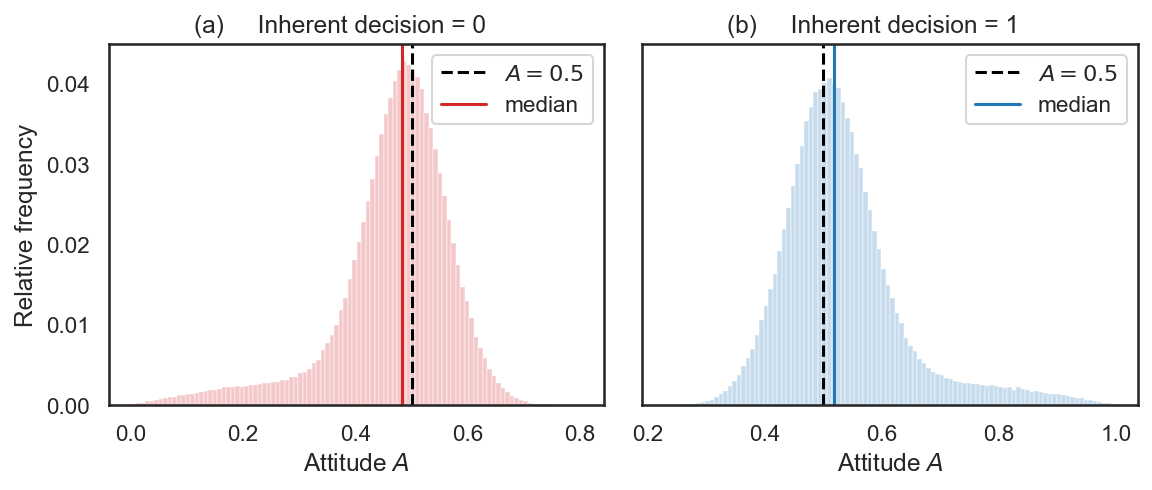

In [5]:

data_uniform = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"])

data_uniform_final = data_uniform.query("step == 1000")

def histogram(data, ax, color):
    histogram = ax.hist(data,bins=100,alpha=0.25,weights=np.zeros_like(data) + 1. / data.size,color=color)
    ax.axvline(0.5,ls="dashed",color="black", label=r"$A=0.5$")
    ax.axvline(np.median(data),color=color, label="median")
    return histogram

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)
histogram(data_uniform_final.query("affinityGoal < 0.5").get("affinity").values, ax0, "tab:red")
histogram(data_uniform_final.query("affinityGoal >= 0.5").get("affinity").values, ax1, "tab:blue")

ax0.set_xlabel(r"Attitude $A$")
ax1.set_xlabel(r"Attitude $A$")
ax0.set_ylabel("Relative frequency")

ax0.set_title("(a)     Inherent decision = 0     ")
ax1.set_title("(b)     Inherent decision = 1     ")

plt.tight_layout()
ax0.legend()
ax1.legend()

plt.show()

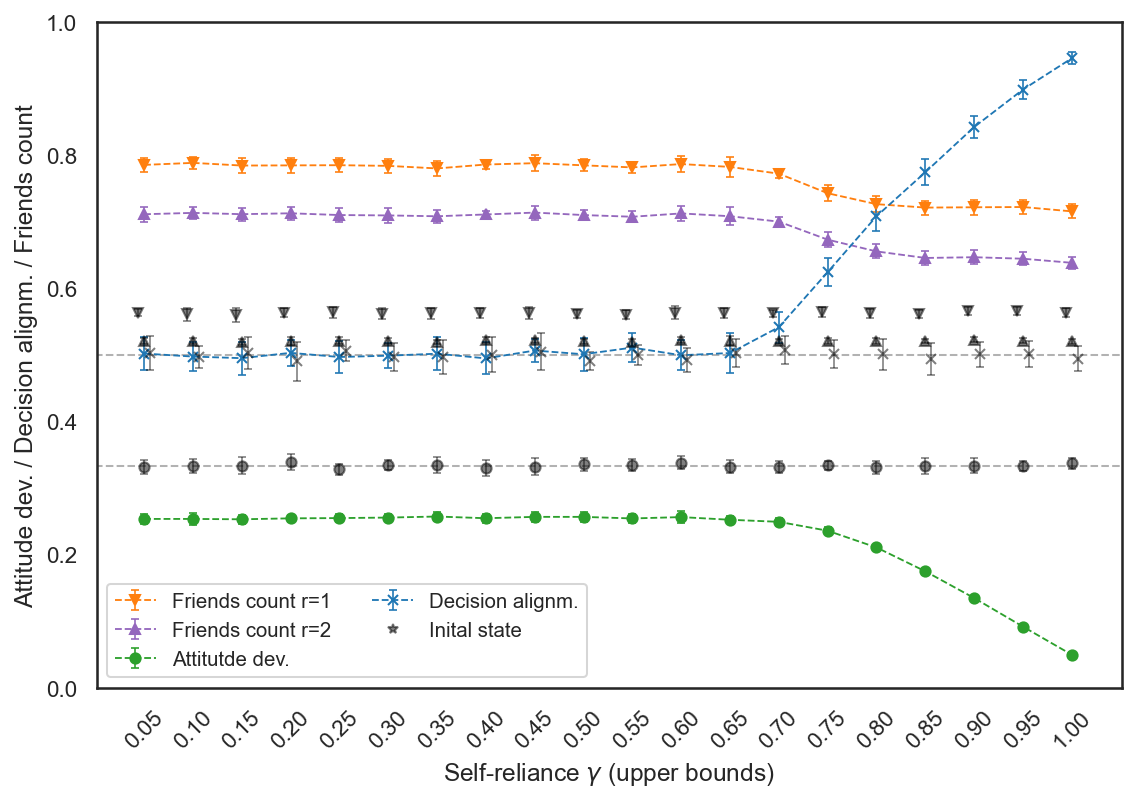

In [8]:
mapping = create_index_mapping(100)

# calculate data
seeds = np.arange(100, 120, 1)
sample = data_uniform.query("step == 0").query("seed in @seeds")
bins = np.linspace(0, 1, 21)
metrics_data_initial ={
    "Self-reliance bin": np.digitize(sample.get("avantgarde").values, bins),
    "Seed": sample.get("seed").values,
    "Attitude deviation": attitude_deviation(sample),
    "Decision alignment": decision_alignment(sample),
    "Friends count": friends_count(sample, mapping),
    "Friends count r=2": friends_count(sample, create_index_mapping(100, r=2)),
}
df_initial = pd.DataFrame(data=metrics_data_initial)
grouped_initial = df_initial.groupby("Self-reliance bin")

sample = data_uniform.query("step == 1_000").query("seed in @seeds")
metrics_data ={
    "Self-reliance bin": np.digitize(sample.get("avantgarde").values, bins),
    "Seed": sample.get("seed").values,
    "Attitude deviation": attitude_deviation(sample),
    "Decision alignment": decision_alignment(sample),
    "Friends count": friends_count(sample, mapping),
    "Friends count r=2": friends_count(sample, create_index_mapping(100, r=2)),
}
df = pd.DataFrame(data=metrics_data)
grouped = df.groupby("Self-reliance bin")

fig, ax = plt.subplots(1, 1, figsize=(9, 6), sharey=False)
plt.rcParams.update({"figure.dpi": 147, "font.size": 11})
style = {"ms": 5, "linestyle":"--", "capsize": 2.,"capthick":0.8, "elinewidth": 0.8, "linewidth":0.9}
styleinit = {"ms": 5, "linestyle":"", "alpha":0.5, "capsize": 2.,"capthick":0.8, "elinewidth": 0.8, "linewidth":0.9}

x = np.arange(1, len(bins))

ax.plot(range(0, len(bins)+1), 1./3 * np.ones(len(bins)+1), "--", c="black", alpha=0.3, linewidth=1.0)
ax.plot(range(0, len(bins)+1), 1./2 * np.ones(len(bins)+1), "--", c="black", alpha=0.3, linewidth=1.0)

gap = 0.125

### final data
grouped = df.groupby(["Seed", "Self-reliance bin"]).mean().groupby(level=1)
ax.errorbar(x, grouped.mean().get("Friends count")/8, yerr=grouped.std().get("Friends count")/8, 
            marker="v", color="tab:orange", **style,
            label="Friends count r=1")

ax.errorbar(x, grouped.mean().get("Friends count r=2")/24, yerr=grouped.std().get("Friends count r=2")/24, 
            marker="^", color="tab:purple", **style,
            label="Friends count r=2")

ax.errorbar(x, grouped.mean().get("Attitude deviation"), yerr=grouped.std().get("Attitude deviation"), 
            marker="o", color="tab:green", **style,
            label="Attitutde dev.")

ax.errorbar(x, grouped.mean().get("Decision alignment"), yerr=grouped.std().get("Decision alignment"), 
            marker="x", color="tab:blue", **style,
            label="Decision alignm.")

### initial data
grouped = df_initial.groupby(["Seed", "Self-reliance bin"]).mean().groupby(level=1)
ax.errorbar(x-gap, grouped.mean().get("Friends count")/8, yerr=grouped.std().get("Friends count")/8, 
               marker="v", color="black", **styleinit)

ax.errorbar(x, grouped.mean().get("Friends count r=2")/24, yerr=grouped.std().get("Friends count r=2")/24, 
            marker="^", color="black", **styleinit)

ax.errorbar(x, grouped.mean().get("Attitude deviation"), yerr=grouped.std().get("Attitude deviation"), 
            marker="o", color="black", **styleinit)

ax.errorbar(x+gap, grouped.mean().get("Decision alignment"), yerr=grouped.std().get("Decision alignment"), 
            marker="x", color="black", **styleinit)

# grouped = df.groupby(["Seed", "Self-reliance bin"]).mean().groupby(level=1)
# ax.errorbar(range(1, len(bins)), 1/2*(grouped.mean().get("Decision alignment")+grouped.mean().get("Friends count")/8), 
#              marker="o", color="tab:red", **style,
#              label="Final decision alignm.")

ax.errorbar([-2], [0], marker="*", color="black", label="Inital state", **styleinit)

ax.legend(loc="lower left", fontsize=10, ncol=2)

#bin_labels = [f'({lower:.1f}, {upper:.1f})' for lower, upper in zip(bins[:-1], bins[1:])]
bin_labels = [f'{upper:.2f}' for lower, upper in zip(bins[:-1], bins[1:])]


ax.set_ylim([0, 1])
dx = bins[1] - bins[0]
ax.set_xlim([dx/2, len(bins)+dx/2])

ax.set_xticks(range(1, len(bins)), bin_labels, rotation=45)
ax.set_xlabel(r"Self-reliance $\gamma$ (upper bounds)")
    
ax.set_ylabel("Attitude dev. / Decision alignm. / Friends count")

plt.show()

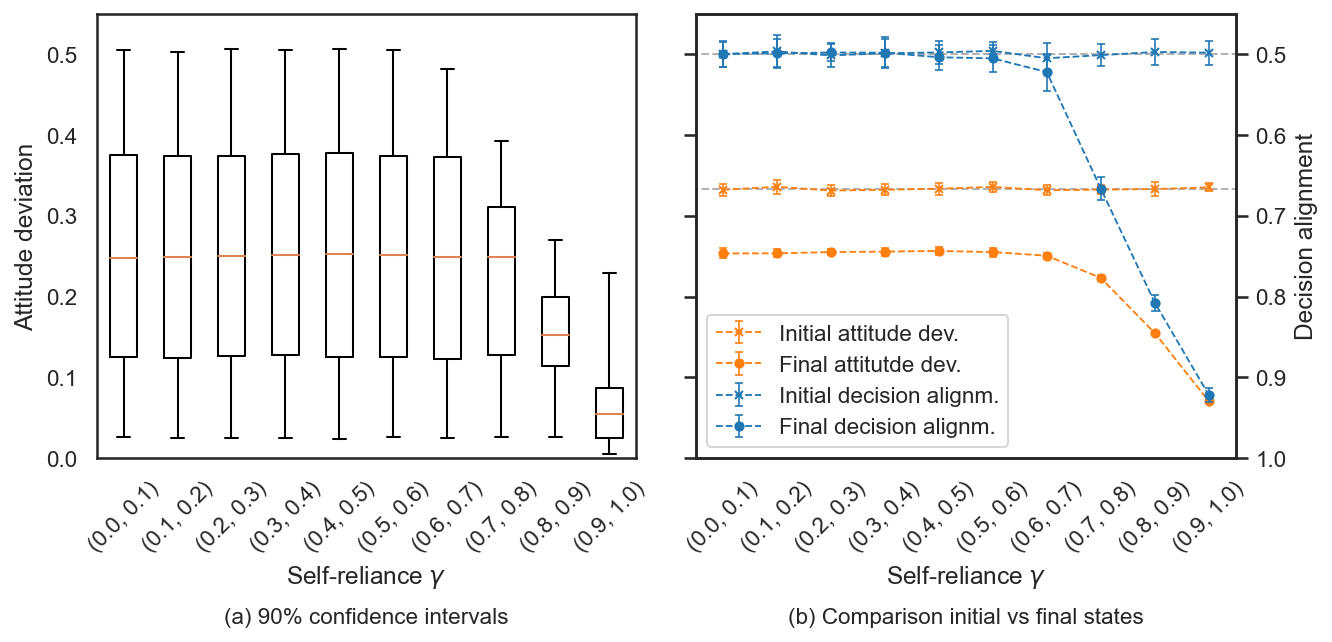

In [16]:
# calculate data
seeds = np.arange(100, 120, 1)
sample = data_uniform.query("step == 0").query("seed in @seeds")
bins = np.linspace(0, 1, 11)
metrics_data_initial ={
    "Self-reliance bin": np.digitize(sample.get("avantgarde").values, bins),
    "Seed": sample.get("seed").values,
    "Attitude deviation": attitude_deviation(sample),
    "Decision alignment": decision_alignment(sample),
    "Satisfaction": satisfaction(sample),
    "Satisfaction natural": weighted_satisfaction(sample, (9/8, 1)),
    "Friends count": friends_count(sample),
    "Friends count r=2": friends_count(sample, map_ids_r2),
}
df_initial = pd.DataFrame(data=metrics_data_initial)
grouped_initial = df_initial.groupby("Self-reliance bin")

sample = data_uniform.query("step == 1_000").query("seed in @seeds")
metrics_data ={
    "Self-reliance bin": np.digitize(sample.get("avantgarde").values, bins),
    "Seed": sample.get("seed").values,
    "Attitude deviation": attitude_deviation(sample),
    "Decision alignment": decision_alignment(sample),
    "Satisfaction": satisfaction(sample),
    "Satisfaction natural": weighted_satisfaction(sample, (9/8, 1)),
    "Friends count": friends_count(sample),
    "Friends count r=2": friends_count(sample, map_ids_r2),
}
df = pd.DataFrame(data=metrics_data)
grouped = df.groupby("Self-reliance bin")

keys = np.arange(100, 106, 1)
grouped = df.groupby(["Seed", "Self-reliance bin"]).mean()
df.groupby(["Seed", "Self-reliance bin"]).mean().groupby(level=1).std()

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
plt.rcParams.update({"figure.dpi": 147, "font.size": 11})
style = {"ms": 4, "linestyle":"--", "capsize": 2.,"capthick":0.8, "elinewidth": 0.8, "linewidth":0.9}

grouped = df.groupby(["Self-reliance bin"])
ax[0].boxplot([grouped.get_group(k+1).get("Attitude deviation").values for k in range(len(bins[:-1]))],
              showfliers=False, whis=(5, 95))

#fig.legend(loc="lower left", bbox_to_anchor=(0,0), bbox_transform=ax2.transAxes)
ax[1].plot(range(0, 12, 1), 1./3 * np.ones(12), "--", c="black", alpha=0.3, linewidth=1.0)

grouped = df_initial.groupby(["Seed", "Self-reliance bin"]).mean().groupby(level=1)
ax[1].errorbar(range(1, 11), grouped.mean().get("Attitude deviation"), yerr=grouped.std().get("Attitude deviation"), 
               marker="x", color="tab:orange", **style,
               label="Initial attitude dev.")

grouped = df.groupby(["Seed", "Self-reliance bin"]).mean().groupby(level=1)
ax[1].errorbar(range(1, 11), grouped.mean().get("Attitude deviation"), yerr=grouped.std().get("Attitude deviation"), 
               marker="o", color="tab:orange", **style,
               label="Final attitutde dev.")

ax2 = ax[1].twinx()
ax2.invert_yaxis()

ax2.plot(range(0, 12, 1), 0.5 * np.ones(12), "--", c="black", alpha=0.3, linewidth=1.0)

grouped = df_initial.groupby(["Seed", "Self-reliance bin"]).mean().groupby(level=1)
ax2.errorbar(range(1, 11), grouped.mean().get("Decision alignment"), yerr=grouped.std().get("Decision alignment"), 
               marker="x", color="tab:blue", **style,
               label="Initial decision alignm.")

grouped = df.groupby(["Seed", "Self-reliance bin"]).mean().groupby(level=1)
ax2.errorbar(range(1, 11), grouped.mean().get("Decision alignment"), yerr=grouped.std().get("Decision alignment"), 
             marker="o", color="tab:blue", **style,
             label="Final decision alignm.")

ax2.set_ylabel("Decision alignment")
ax[1].set_ylim([0, 0.55])
ax2.set_ylim([1.0, 0.45])

fig.legend(loc="lower left", bbox_to_anchor=(0,0), bbox_transform=ax2.transAxes)

bin_labels = [f'({lower:.1f}, {upper:.1f})' for lower, upper in zip(bins[:-1], bins[1:])]
for axis in ax:
    # Set the x-axis tick labels to the bin edges
    axis.set_xticks(range(1, len(bins)), bin_labels, rotation=45)
    axis.set_xlabel(r"Self-reliance $\gamma$")
    #axis.set_ylim([0, 0.6])
    axis.set_xlim([0.5, 10.5])
    
ax[0].set_ylabel("Attitude deviation")
ax[0].set_title("(a) 90% confidence intervals", y=-0.4, fontsize=11)
ax[1].set_title("(b) Comparison initial vs final states", y=-0.4, fontsize=11)

plt.subplots_adjust(wspace=0.11)

plt.show()

In [ ]:
N = 100

# select files
location = "..\data\paramstest"
files = []
fkey = "avantgarde"
num = "5.0"
for fname in os.listdir(location):
    if f"-{num}" in fname and f"-{fkey}" in fname \
        and "_mode" in fname:
        files.append(os.path.join(location, fname))

mapping = create_index_mapping(100)

# load data
def process_file(file):
    # Log
    print(f"Working on: {file}")
    data = LoadSimulation(file, columns=["seed", "id", "avantgarde", "affinity", "affinityGoal", "step"])
    mode = float(file.split("mode-")[1].split("_")[0].split(".csv")[0])
    eq_data = data.query("step == 100")
    mean = eq_data.get("avantgarde").mean()
    
    metrics = []
    # get metrics
    for s, sample in eq_data.groupby("seed"): #.query("seed == @seed")
        Aii = sample.get("affinity").values
        doi = density_of_interfaces(np.int32(Aii >= 0.5), mapping)
    
        friends_result = np.array(friends_count(sample, mapping)) / 8
        friends_mean = np.mean(friends_result)
        friends_q5 = np.percentile(friends_result, 5)
        friends_q25 = np.percentile(friends_result, 25)
        friends_q50 = np.percentile(friends_result, 50)
        friends_q75 = np.percentile(friends_result, 75)
        friends_q95 = np.percentile(friends_result, 95)
        
        decision_result = decision_alignment(sample)
        decision_mean = np.mean(decision_result)
        
        satisfaction_result = satisfaction(sample, mapping)
        satisfaction_mean = np.mean(satisfaction_result)
        #satisfaction_std = np.std(satisfaction_result)
        satisfaction_q5 = np.percentile(satisfaction_result, 25)
        satisfaction_q95 = np.percentile(satisfaction_result, 75)
        
        metrics.append((doi, friends_mean, decision_mean, 
                        friends_q5, friends_q25, friends_q50, friends_q75, friends_q95,
                        satisfaction_mean, satisfaction_q5, satisfaction_q95))

    return mean, list(zip(*metrics))

x, y = zip(*[process_file(file) for file in files])

files = []
num = "10.0"
for fname in os.listdir(location):
    if f"-{num}" in fname and f"-{fkey}" in fname \
        and "_mode" in fname:
        files.append(os.path.join(location, fname))
        
x10, y10 = zip(*[process_file(file) for file in files])

files = []
num = "constant"
for fname in os.listdir(location):
    if f"_{num}" in fname and f"-{fkey}" in fname \
        and "_mode" in fname:
        files.append(os.path.join(location, fname))
        
xc, yc = zip(*[process_file(file) for file in files])

In [ ]:
plt.rcParams.update({"font.size":11, "figure.dpi": 147, "lines.linewidth": 1.0})
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 4))

yy = np.array(y)
yy10 = np.array(y10)
yyc = np.array(yc)

ax.errorbar(x, yy[:,2].mean(axis=1), label="Decision alignment 1", 
            marker="d", linestyle=":", color="tab:blue", markersize=4)

ax.errorbar(x10, yy10[:,2].mean(axis=1), label="Decision alignment3", 
            marker="*", linestyle="--", color="tab:blue", markersize=4)

ax.errorbar(xc, yyc[:,2].mean(axis=1), label="Decision alignment 2", 
            marker="o", linestyle="-", color="tab:blue", markersize=4)

ax.errorbar(x, yy[:,1].mean(axis=1), label="N.N. Friends", marker="d", linestyle=":", color="tab:orange", markersize=4)
ax.errorbar(x10, yy10[:,1].mean(axis=1), label="N.N. Friends", marker="*", linestyle="--", color="tab:orange", markersize=4)
ax.errorbar(xc, yyc[:,1].mean(axis=1), label="N.N. Friends", marker="o", linestyle="-", color="tab:orange", markersize=4)

ax.set_xlabel(r"Mean self-reliance $\langle \gamma \rangle$")
ax1.set_xlabel(r"Mean self-reliance $\langle \gamma \rangle$")

ax1.errorbar(x, yy[:,8].mean(axis=1), label=r'$c_{\gamma} = 7.0$', 
            marker="d", linestyle=":", color="tab:blue", markersize=4)

ax1.errorbar(x10, yy10[:,8].mean(axis=1), label=r'$c_{\gamma} = 12.0$', 
            marker="*", linestyle="--", color="tab:blue", markersize=4)

ax1.errorbar(xc, yyc[:,8].mean(axis=1), label=r'$c_{\gamma} \rightarrow \infty$ (incl. IQR)', 
            marker="x", linestyle="-", color="tab:blue", markersize=4)

ax1.fill_between(xc, yyc[:,9].mean(axis=1), yyc[:,10].mean(axis=1), alpha=0.2)

#ax.set_ylabel(r"$y\left(t_{equil.}\right) - y(t_{initial})$")

from matplotlib.lines import Line2D
# Create custom legend handles and labels
legend_handles = [
    Line2D([0], [0], marker='s', color='tab:orange', linestyle="", markersize=6, label='Friends count'),
    Line2D([0], [0], marker='s', color='tab:blue', linestyle="", markersize=6, label='Decision Alignment'),
    Line2D([0], [0], color='tab:gray', linestyle=':', marker="d", linewidth=1, label=r'$c_{\gamma} = 7.0$'),
    Line2D([0], [0], color='tab:gray', linestyle='--', marker='*', linewidth=1, label=r'$c_{\gamma} = 12.0$'),
    Line2D([0], [0], color='tab:gray', linestyle='-', marker='o', linewidth=1, label=r'$c_{\gamma} \rightarrow \infty$')
]

# Add the legend to the plot
ax.legend(handles=legend_handles, loc='best')

ax1.legend(fontsize=11)

ax.set_ylim(ax.get_ylim())
ax1.set_ylim(ax1.get_ylim())
ax.plot([2/3, 2/3], [0, 1.1], color="tab:gray",linestyle="--", alpha=0.5)
ax1.plot([2/3, 2/3], [0, 1.1], color="tab:gray",linestyle="--", alpha=0.5)

ax.set_title(r"(a)   Decision alignment vs. Friends")
ax1.set_title(r"(b)   Satisfaction")
plt.show()

In [14]:
from BlockNNClustering import *
from dataclasses import dataclass

def connectivity(labels):
    unique_labels_, counts_ = np.unique(labels, return_counts=True)
    noise_count_ = counts_[unique_labels_ == -1][0] if -1 in unique_labels_ else 0
    sizes_ = counts_[unique_labels_ >= 0]
    n_clusters = sizes_.size
    n_agents = np.sum(counts_[unique_labels_ >= -1])
    return (n_agents - (n_clusters + noise_count_)) / (n_agents - 1)

def noise_count_from_labels(labels):
    unique_labels_, counts_ = np.unique(labels, return_counts=True)
    return counts_[unique_labels_ == -1][0] if -1 in unique_labels_ else 0

def mean_size_from_labels(labels):
    unique_labels_, counts_ = np.unique(labels, return_counts=True)
    return counts_[unique_labels_ >= 0].mean()

def connectivity_from_labels(labels):
    return connectivity(labels)

def cluster_count_from_labels(labels):
    unique_labels_, counts_ = np.unique(labels, return_counts=True)
    return unique_labels_[unique_labels_ >= 0].size

@dataclass
class AnalyzedModelState:
    magnetisation: float
    density_of_interfaces: float
    mean_size: tuple
    cluster_count: tuple
    fragmentation: tuple
    
    @staticmethod
    def build(decision_grid):
        my_clustering = BlockNNClustering(min_cluster_size=1)
        _, labels = my_clustering.fit(decision_grid)
        
        if len(labels) == 2:
            (neg, pos) = labels
        else:
            if np.unique(decision_grid)[0] == 0:
                (neg, pos) = (decision_grid+1, (decision_grid+1)*(-2))
            else:
                (neg, pos) = (decision_grid*(-2), decision_grid)
        
        flattened = decision_grid.flatten()
        return AnalyzedModelState(
            magnetisation(flattened),
            density_of_interfaces(flattened, mapping),
            (mean_size_from_labels(neg), mean_size_from_labels(pos)),
            (cluster_count_from_labels(neg), cluster_count_from_labels(pos)),
            (connectivity_from_labels(neg), connectivity_from_labels(pos)),
        )
    
mm = np.arange(0.6, 0.701, 0.002)
seeds = np.arange(100, 149, 1)
results = []
for m in mm:
    file = f"agent_data_avantgarde_m-{m:.3f}.csv"
    print(file)
    path = os.path.join(location, file)
    data = LoadSimulation(path, columns=columns)

    stats = []
    for seed in seeds:
        sample = data.query("seed == @seed")
        decision_grid = np.array(sample.get("affinity").values.reshape(100, 100) >= 0.5, dtype="int")
        stats.append(AnalyzedModelState.build(decision_grid))
    
    results.append(stats)

agent_data_avantgarde_m-0.600.csv
agent_data_avantgarde_m-0.602.csv
agent_data_avantgarde_m-0.604.csv
agent_data_avantgarde_m-0.606.csv
agent_data_avantgarde_m-0.608.csv
agent_data_avantgarde_m-0.610.csv
agent_data_avantgarde_m-0.612.csv
agent_data_avantgarde_m-0.614.csv
agent_data_avantgarde_m-0.616.csv
agent_data_avantgarde_m-0.618.csv
agent_data_avantgarde_m-0.620.csv
agent_data_avantgarde_m-0.622.csv
agent_data_avantgarde_m-0.624.csv
agent_data_avantgarde_m-0.626.csv
agent_data_avantgarde_m-0.628.csv
agent_data_avantgarde_m-0.630.csv
agent_data_avantgarde_m-0.632.csv
agent_data_avantgarde_m-0.634.csv
agent_data_avantgarde_m-0.636.csv
agent_data_avantgarde_m-0.638.csv
agent_data_avantgarde_m-0.640.csv
agent_data_avantgarde_m-0.642.csv
agent_data_avantgarde_m-0.644.csv
agent_data_avantgarde_m-0.646.csv
agent_data_avantgarde_m-0.648.csv
agent_data_avantgarde_m-0.650.csv
agent_data_avantgarde_m-0.652.csv
agent_data_avantgarde_m-0.654.csv
agent_data_avantgarde_m-0.656.csv
agent_data_ava

In [ ]:
mm = np.arange(0.460, 0.540, 0.002)
seeds = np.arange(100, 149, 1)
resultsf = []
for m in mm:
    file = f"agent_data_goal_m-{m:.3f}.csv"
    print(file)
    path = os.path.join(location, file)
    data = LoadSimulation(path, columns=columns)

    stats = []
    for seed in seeds:
        sample = data.query("seed == @seed")
        decision_grid = np.array(sample.get("affinity").values.reshape(100, 100) >= 0.5, dtype="int")
        stats.append(AnalyzedModelState.build(decision_grid))
    
    resultsf.append(stats)

agent_data_goal_m-0.460.csv


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3240/3995753626.py:18: RuntimeWarning: Mean of empty slice.
  return counts_[unique_labels_ >= 0].mean()
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


agent_data_goal_m-0.462.csv


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3240/3995753626.py:18: RuntimeWarning: Mean of empty slice.
  return counts_[unique_labels_ >= 0].mean()
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


agent_data_goal_m-0.464.csv


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3240/3995753626.py:18: RuntimeWarning: Mean of empty slice.
  return counts_[unique_labels_ >= 0].mean()
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


agent_data_goal_m-0.466.csv


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3240/3995753626.py:18: RuntimeWarning: Mean of empty slice.
  return counts_[unique_labels_ >= 0].mean()
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


agent_data_goal_m-0.468.csv


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3240/3995753626.py:18: RuntimeWarning: Mean of empty slice.
  return counts_[unique_labels_ >= 0].mean()
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


agent_data_goal_m-0.470.csv


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3240/3995753626.py:18: RuntimeWarning: Mean of empty slice.
  return counts_[unique_labels_ >= 0].mean()
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


agent_data_goal_m-0.472.csv


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3240/3995753626.py:18: RuntimeWarning: Mean of empty slice.
  return counts_[unique_labels_ >= 0].mean()
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


NameError: name 'resultsf' is not defined

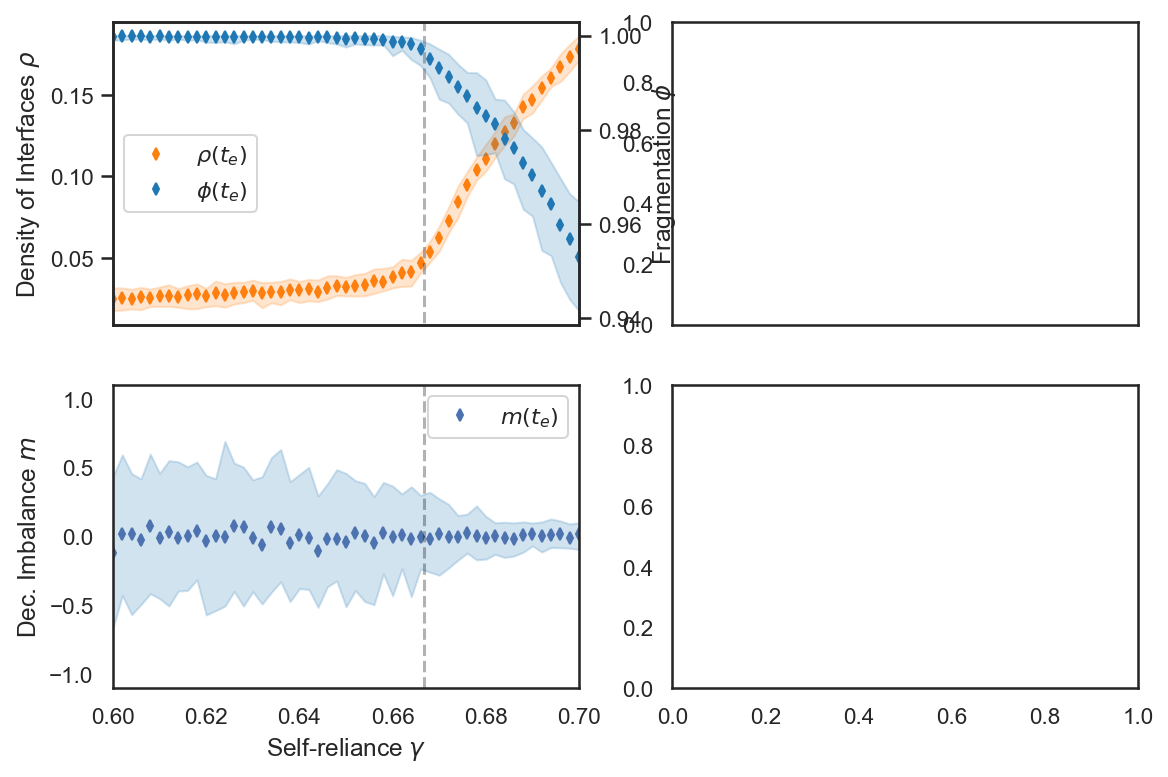

In [15]:
plt.rcParams.update({"figure.dpi": 147, "font.size": 11})
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(9, 6), sharex="col")


mm = np.arange(0.6, 0.701, 0.002)
# fragmentation
fmean = [np.mean([s.density_of_interfaces for s in x]) for x in results]
fmin = [np.percentile([s.density_of_interfaces for s in x], 5) for x in results]
fmax = [np.percentile([s.density_of_interfaces for s in x], 95) for x in results]
line1, = ax1.plot(mm, fmean, marker="d", linestyle="", ms="4", label=r"$\rho(t_e)$", color="tab:orange")
ax1.fill_between(mm, fmin, fmax, color="tab:orange", alpha=0.2)

ax1.set_ylim(ax1.get_ylim())
ax1.plot([2/3, 2/3], [0., 1.1], linestyle="--", color="black", alpha=0.3)

# density_of_interfaces
fmean = [np.mean([s.fragmentation for s in x]) for x in results]
fmin = [np.percentile([s.fragmentation for s in x], 5) for x in results]
fmax = [np.percentile([s.fragmentation for s in x], 95) for x in results]

ax1b = ax1.twinx()
line2, = ax1b.plot(mm, fmean, marker="d", linestyle="", ms="4", color="tab:blue", label=r"$\phi(t_e)$")
ax1b.fill_between(mm, fmin, fmax, color="tab:blue", alpha=0.2)
ax1.set_xlim([0.6, 0.7])
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="center left")

mmf = np.arange(0.460, 0.540, 0.002)
# magnetization
fmean = [np.mean([s.magnetisation for s in x]) for x in results]
fmin = [np.percentile([s.magnetisation for s in x], 5) for x in results]
fmax = [np.percentile([s.magnetisation for s in x], 95) for x in results]
ax2.plot(mm, fmean, marker="d", linestyle="", ms="4", label=r"$m(t_e)$")
ax2.fill_between(mm, fmin, fmax, color="tab:blue", alpha=0.2)
ax2.set_ylim([-1.1,1.1])
ax2.plot([2/3, 2/3], [-1.1, 1.1], linestyle="--", color="black", alpha=0.3)

#ax1.set_xlabel(r"Self-reliance $\gamma$")
ax1b.set_ylabel(r"Fragmentation $\phi$")
ax1.set_ylabel(r"Density of Interfaces $\rho$")

ax2.set_xlabel(r"Self-reliance $\gamma$")
ax2.set_ylabel(r"Dec. Imbalance $m$")
ax2.legend()

# density_of_interfaces

fmean = [np.mean([s.density_of_interfaces for s in x]) for x in resultsf]
fmin = [np.percentile([s.density_of_interfaces for s in x], 5) for x in resultsf]
fmax = [np.percentile([s.density_of_interfaces for s in x], 95) for x in resultsf]

line2, = ax3.plot(mmf, fmean, marker="d", linestyle="", ms="4", color="tab:orange", label=r"$\rho(t_e)$")
ax3.fill_between(mmf, fmin, fmax, color="tab:orange", alpha=0.2)
#ax1.set_xlim([0.6, 0.7])
lines = [line1, line1b, line2]
labels = [l.get_label() for l in lines]
ax3.legend() # lines, labels, loc="center left")

ax3.set_ylim(ax3.get_ylim())
ax3.plot([1/2, 1/2], [-0.1, 1.1], linestyle="--", color="black", alpha=0.3)

# magnetization
fmean = [np.mean([s.magnetisation for s in x]) for x in resultsf]
fmin = [np.percentile([s.magnetisation for s in x], 5) for x in resultsf]
fmax = [np.percentile([s.magnetisation for s in x], 95) for x in resultsf]
ax4.plot(mmf, fmean, marker="d", linestyle="", ms="4", label=r"$m(t_e)$")
ax4.fill_between(mmf, fmin, fmax, color="tab:blue", alpha=0.2)
ax4.set_ylim([-1.1,1.1])
ax4.plot([1/2, 1/2], [-1.1, 1.1], linestyle="--", color="black", alpha=0.3)
ax4.legend()

#ax3.set_xlabel(r"Fixed attitude $\hat{A}$")
#ax3.set_ylabel(r"Fragmentation $\phi$")
ax3.set_ylabel(r"Density of Interfaces $\rho$")

ax4.set_xlabel(r"Fixed attitude $\hat{A}$")
ax4.set_ylabel(r"Dec. Imbalance $m$")

plt.subplots_adjust(wspace=0.6, hspace=0.1)